In [16]:
#Imports
import os
import math
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lns

from utils import stack_images

#Set paths
filepath = os.path.join(os.getcwd(), "data")
imspath = os.path.join(filepath, "covers")
music = pd.read_excel(os.path.join(filepath, "ratings.xlsx"))
figspath = os.path.join(os.getcwd(), "visuals")

In [17]:
### Clean the data ###

#Turn Genre from string to list of strings
music['Genre'] = music['Genre'].str.split(', ')
music['Genre'].head()

#Select only rated albums, and cast rating to categorical
music = music[music['Rating'].notna()]
music['Rating'] = music['Rating'].astype(pd.CategoricalDtype(categories = [1,2,3,4,5], ordered = True))
albums = music[music['Type'] == "Album"]

#Check if all rated albums have imnames that are in imspath
if len(albums[albums['Img'] != ""]) != len(albums):
    print("Add album covers and file names")
    print(albums[albums['Img'] == ""])
imdif = set(list(albums['Img'])).difference(set(os.listdir(imspath)))
if len(imdif) > 0:
    print("Correct image file names or add album covers to folder")
    print(imdif)

In [18]:
### Create album cover bar chart ###

from figures import create_album_bar

#Optional: Limit to a certain genre
#albums = albums['Rock' in albums['Genre']]

fig = create_album_bar(albums, imsize = 256, n_wide = 5, imspath = imspath)
fig.savefig(os.path.join(figspath, "album-bar-chart.png"))

ModuleNotFoundError: No module named 'figures'

In [ ]:
### Function to create genre word cloud ###

def create_genre_cloud(genres, filename):
    pass

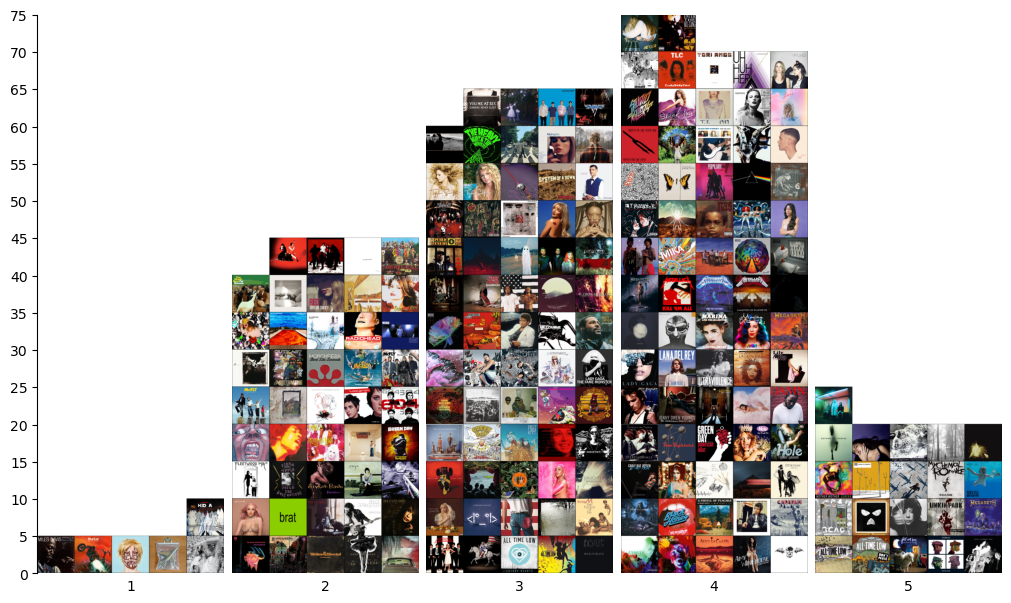

In [ ]:
### Call function ###

#albums = albums[albums['Genre']]
